# Customer Analytics

## Prediction model

### Create a model to predict customers choices on a cruise trip. 


In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I  print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Logistic regression from sklearn
from sklearn.linear_model  import LogisticRegression

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
from sklearn.model_selection import GridSearchCV



In [2]:
#Download the Data available
df = pd.read_stata("Cruise_DCE-3.dta") 

In [3]:
#Check the first rows of the data
df.head(20)

,CaseID,Concept,Choice,Att1_Num_Days,Att2_ShipAmenities,Att3_PricePerPerson
0,1.0,1.0,No,8 days,"Fewer amenities, older ship",$125 per person per day
1,1.0,2.0,Chosen,7 days,"Fewer amenities, older ship",$100 per person per day
2,1.0,1.0,Chosen,9 days,"Fewer amenities, older ship",$100 per person per day
3,1.0,2.0,No,8 days,"More amenities, newer ship",$125 per person per day
4,1.0,1.0,Chosen,11 days,"Fewer amenities, older ship",$175 per person per day
5,1.0,2.0,No,9 days,"More amenities, newer ship",$150 per person per day
6,1.0,1.0,Chosen,10 days,"Fewer amenities, older ship",$150 per person per day
7,1.0,2.0,No,11 days,"Fewer amenities, older ship",$175 per person per day
8,1.0,1.0,Chosen,7 days,"More amenities, newer ship",$100 per person per day
9,1.0,2.0,No,10 days,"More amenities, newer ship",$175 per person per day


In [4]:
# Dataset has 6 columns and 8982 rows
df.shape

(8982, 6)

In [5]:
# Check Rows types and Non-Null count. The data has no missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8982 entries, 0 to 8981
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   CaseID               8982 non-null   float64 
 1   Concept              8982 non-null   float64 
 2   Choice               8982 non-null   category
 3   Att1_Num_Days        8982 non-null   category
 4   Att2_ShipAmenities   8982 non-null   category
 5   Att3_PricePerPerson  8982 non-null   category
dtypes: category(4), float64(2)
memory usage: 246.2 KB


In [6]:
#Statistical information on numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CaseID,8982.0,457.028724,271.798149,1.0,221.25,449.0,696.0,935.0
Concept,8982.0,1.500000,0.500028,1.0,1.00,1.5,2.0,2.0


In [7]:
# Statistical information on categorical variables
df.describe(include=['category']).T

,count,unique,top,freq
Choice,8982,2,Chosen,4491
Att1_Num_Days,8982,5,8 days,1850
Att2_ShipAmenities,8982,2,"More amenities, newer ship",4794
Att3_PricePerPerson,8982,5,$100 per person per day,1963


In [8]:
# Check the unique values in each category - possibily finding necessary adjustments to data
for i in df:
    print('Unique values in',i, 'are :')
    print(df[i].value_counts())
    print('*'*50)

Unique values in CaseID are :
524.0    30
401.0    30
21.0     30
91.0     26
197.0    26
         ..
47.0      6
529.0     6
829.0     4
172.0     2
566.0     2
Name: CaseID, Length: 600, dtype: int64
**************************************************
Unique values in Concept are :
2.0    4491
1.0    4491
Name: Concept, dtype: int64
**************************************************
Unique values in Choice are :
Chosen    4491
No        4491
Name: Choice, dtype: int64
**************************************************
Unique values in Att1_Num_Days are :
8 days     1850
9 days     1801
7 days     1801
10 days    1787
11 days    1743
Name: Att1_Num_Days, dtype: int64
**************************************************
Unique values in Att2_ShipAmenities are :
More amenities, newer ship     4794
Fewer amenities, older ship    4188
Name: Att2_ShipAmenities, dtype: int64
**************************************************
Unique values in Att3_PricePerPerson are :
$100 per person per day   

In [9]:
#Defining the dependent variables labels as one and zero
df['Choice'].replace('Chosen',1, inplace=True)
df['Choice'].replace('No',0,inplace=True)

In [10]:
df.head()

,CaseID,Concept,Choice,Att1_Num_Days,Att2_ShipAmenities,Att3_PricePerPerson
0,1.0,1.0,0,8 days,"Fewer amenities, older ship",$125 per person per day
1,1.0,2.0,1,7 days,"Fewer amenities, older ship",$100 per person per day
2,1.0,1.0,1,9 days,"Fewer amenities, older ship",$100 per person per day
3,1.0,2.0,0,8 days,"More amenities, newer ship",$125 per person per day
4,1.0,1.0,1,11 days,"Fewer amenities, older ship",$175 per person per day


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8982 entries, 0 to 8981
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   CaseID               8982 non-null   float64 
 1   Concept              8982 non-null   float64 
 2   Choice               8982 non-null   category
 3   Att1_Num_Days        8982 non-null   category
 4   Att2_ShipAmenities   8982 non-null   category
 5   Att3_PricePerPerson  8982 non-null   category
dtypes: category(4), float64(2)
memory usage: 246.2 KB


In [12]:
# Split the dataset into X and y variables (dependent & independent). 
# We want to predict if customers will chose the cruise or not, therefore Choice is our dependent variable 
X = df.drop(["Choice"], axis=1)
y = df[["Choice"]]
print(X.shape)
print(y.shape)

(8982, 5)
(8982, 1)


In [13]:
# creating dummy variables with the categorical columns
X = pd.get_dummies(X, columns=['Att1_Num_Days', 'Att2_ShipAmenities', 'Att3_PricePerPerson'], drop_first=True)
X.head()

,CaseID,Concept,Att1_Num_Days_8 days,Att1_Num_Days_9 days,Att1_Num_Days_10 days,Att1_Num_Days_11 days,"Att2_ShipAmenities_More amenities, newer ship",Att3_PricePerPerson_$125 per person per day,Att3_PricePerPerson_$150 per person per day,Att3_PricePerPerson_$175 per person per day,Att3_PricePerPerson_$200 per person per day
0,1.0,1.0,1,0,0,0,0,1,0,0,0
1,1.0,2.0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,0,1,0,0,0,0,0,0,0
3,1.0,2.0,1,0,0,0,1,1,0,0,0
4,1.0,1.0,0,0,0,1,0,0,0,1,0


In [14]:
print(X.shape)
print(y.shape)

(8982, 11)
(8982, 1)


In [15]:
# split the data into train (70%) and test(30%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6287, 11)
(2695, 11)
(6287, 1)
(2695, 1)


### Build a model with SKlearner

In [17]:
# Fit the logistic model on train
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

model = LogisticRegression(solver="liblinear")
modelscore =model.fit(X_train, y_train)

#predict on testX_testX_test)
y_predict = model.predict(X_test)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0  0.000053  0.096799  0.130549  0.017466 -0.055546 -0.180326  0.412353   

          7         8         9        10  intercept  
0 -0.172335 -0.361801 -0.596769 -0.695854   -0.02972  


In [18]:
def get_metrics_score(model,library,train,test,train_y,test_y,threshold=0.5,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    library: Takes two arguments stats for statsmodels and sklearn for sklearn library 
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    if library=='stats':
        score_list=[] 
    
        pred_train = (model.predict(train)>threshold)
        pred_test = (model.predict(test)>threshold)

        pred_train = np.round(pred_train)
        pred_test = np.round(pred_test)
    
        train_acc = accuracy_score(pred_train,train_y)
        test_acc = accuracy_score(pred_test,test_y)
    
        train_recall = recall_score(train_y,pred_train)
        test_recall = recall_score(test_y,pred_test)
    
        train_precision = precision_score(train_y,pred_train)
        test_precision = precision_score(test_y,pred_test)
    
        train_f1 = f1_score(train_y,pred_train)
        test_f1 = f1_score(test_y,pred_test)
        
        score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    elif library=='sklearn':
        score_list=[] 
    
        pred_train = model.predict(train)
        pred_test = model.predict(test)
    
        train_acc = accuracy_score(pred_train,train_y)
        test_acc = accuracy_score(pred_test,test_y)

        train_recall = recall_score(train_y,pred_train)
        test_recall = recall_score(test_y,pred_test)

        train_precision = precision_score(train_y,pred_train)
        test_precision = precision_score(test_y,pred_test)

        train_f1 = f1_score(train_y,pred_train)
        test_f1 = f1_score(test_y,pred_test)


        score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))

    
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
   
    if roc == True and library=='sklearn':
        pred_train_prob = model.predict_proba(train)[:,1]
        pred_test_prob  = model.predict_proba(test)[:,1]
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train_prob))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test_prob))
        
    elif roc == True and library=='stats':
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [19]:
# Let's check model performances for this model
# The score shows that the model predicted only 56% of the time correctly

scores_LR = get_metrics_score(modelscore,'sklearn',X_train,X_test,y_train,y_test)

Accuracy on training set :  0.5684746301892795
Accuracy on test set :  0.5599257884972171
Recall on training set :  0.5667410003185728
Recall on test set :  0.5687869822485208
Precision on training set :  0.5680076628352491
Precision on test set :  0.5604956268221575
F1 on training set :  0.5673736246212726
F1 on test set :  0.564610866372981


<AxesSubplot:>

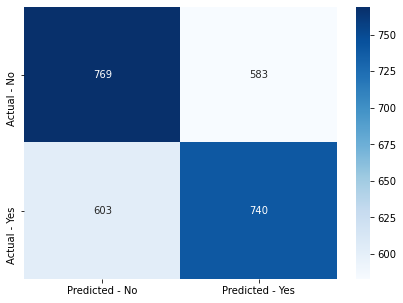

In [20]:
#Confusion matrix gives a more detailed overview about the prediction
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='.3g')

**Observations**

- True Negative values are 769 - model predicted that 769 people would not choose the cruise and they did not choose

- True Positive values are 740 - model predicted that 740 people would choose the cruise and they actually did

- False Positives (FP): we incorrectly predicted that 603 would not take the cruise, but they actually did (a "Type I error") 

- False Negatives (FN): we incorrectly predicted that 583 people would take the cruise, but they did not take(a "Type II error") 

- This model performance is very poor and does not deliver a reliable prediction about the outcomes.

### In order to check if the performance might increase in a different statistical model, below there is a calculation based on Statsmodel package

### Build a model with Statsmodel Library

In [21]:
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(warn_convergence =False)

# Let's check model performances for this model
scores_LR = get_metrics_score(lg,'stats',X_train,X_test,y_train,y_test)

Optimization terminated successfully.
         Current function value: 0.678312
         Iterations 4
Accuracy on training set :  0.5695880388102433
Accuracy on test set :  0.5591836734693878
Recall on training set :  0.5689710098757567
Recall on test set :  0.5687869822485208
Precision on training set :  0.5689710098757567
Precision on test set :  0.5596797671033479
F1 on training set :  0.5689710098757567
F1 on test set :  0.5641966250917095


In [22]:
lg.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                       Results: Logit
=============================================================================================
Model:                        Logit                     Pseudo R-squared:          0.021     
Dependent Variable:           Choice                    AIC:                       8551.0901 
Date:                         2022-10-12 01:25          BIC:                       8625.2987 
No. Observations:             6287                      Log-Likelihood:            -4264.5   
Df Model:                     10                        LL-Null:                   -4357.8   
Df Residuals:                 6276                      LLR p-value:               1.0306e-34
Converged:                    1.0000                    Scale:                     1.0000    
No. Iterations:               4.0000                                                         
---------------------------------------------------------------------------------------------
                                               Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------------------------------
CaseID                                         0.0000   0.0001  0.5239 0.6003 -0.0001  0.0002
Concept                                        0.0902   0.0388  2.3227 0.0202  0.0141  0.1664
Att1_Num_Days_8 days                           0.1256   0.0760  1.6520 0.0985 -0.0234  0.2746
Att1_Num_Days_9 days                           0.0114   0.0760  0.1499 0.8808 -0.1375  0.1603
Att1_Num_Days_10 days                         -0.0613   0.0763 -0.8034 0.4218 -0.2108  0.0882
Att1_Num_Days_11 days                         -0.1869   0.0767 -2.4352 0.0149 -0.3373 -0.0365
Att2_ShipAmenities_More amenities, newer ship  0.4114   0.0501  8.2029 0.0000  0.3131  0.5096
Att3_PricePerPerson_$125 per person per day   -0.1845   0.0737 -2.5053 0.0122 -0.3289 -0.0402
Att3_PricePerPerson_$150 per person per day   -0.3747   0.0750 -4.9951 0.0000 -0.5217 -0.2277
Att3_PricePerPerson_$175 per person per day   -0.6105   0.0763 -8.0011 0.0000 -0.7601 -0.4610
Att3_PricePerPerson_$200 per person per day   -0.7101   0.0771 -9.2078 0.0000 -0.8613 -0.5590
=============================================================================================

"""

**Observations**

-Statsmodel also has poor performance on the predictions, with very similar scores than sklearner.

-Though Statsmodel show the p-values for different variables and the possibility of haviing multicolinearity among them. 

### Conclusion

To improve model performance it would be necessary to exclude the variables with the highest p-values and run the logistic model again. 

Otherwise, it would be possible to choose a different approach and use decision tree or random forrest to run the model and improve performance
